# Apprentissage supervisé - Regression, DecisionTreeRegressor, RandomForestRegressor

## 1. Les bibliothéques necessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

## 1.2 Information sur les données

### 1.2.1. Importation du dataset 'housing.csv'

In [2]:
#Lecture des données
#affcihage de l'entête
def get_csv():
    csv = "housing.csv"
    return pd.read_csv(csv)
housing = get_csv()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### On distingue deux cas d’utilisation:

on utilise les arbres de classification pour expliquer et/ou prédire l’appartenance d’objets (observations, individus) à une classe (ou modalité ou catégorie) d’une variable qualitative, sur la base de variables explicatives quantitatives et/ou qualitatives.

on utilise les arbres de régression pour expliquer et/ou prédire les valeurs prise par une variable dépendante quantitative, en fonction de variables explicatives quantitatives et/ou qualitatives.

Sachant que la valeur cible est "median_house_value", nous traitons un problème de régression.

### 1.2.2. Exploration des données

In [3]:
#code qui affiche le nombre de lignes et de colonnes des données,
housing.shape

(20640, 10)

In [4]:
#le type des attributs et le nombre de valeurs non nulles
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Nous remarquons que l'attribut total_bedrooms n'a que 20 433 valeurs non nulles. 207 enregistrements n'ont pas de valeur.

### 1.2.3. La colonne ocean_proximity 

C'est un attribut catégorique, nous affichons l’occurrence des valeurs utilisées dans cet attribut en utilisant la méthode value_counts ().

In [5]:
#obtenir les différentes valeurs de ocean_proximity
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### 1.2.4. Satatistiques des attributs du jeu de données

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 1.2.5. Histogrames des différents attributs

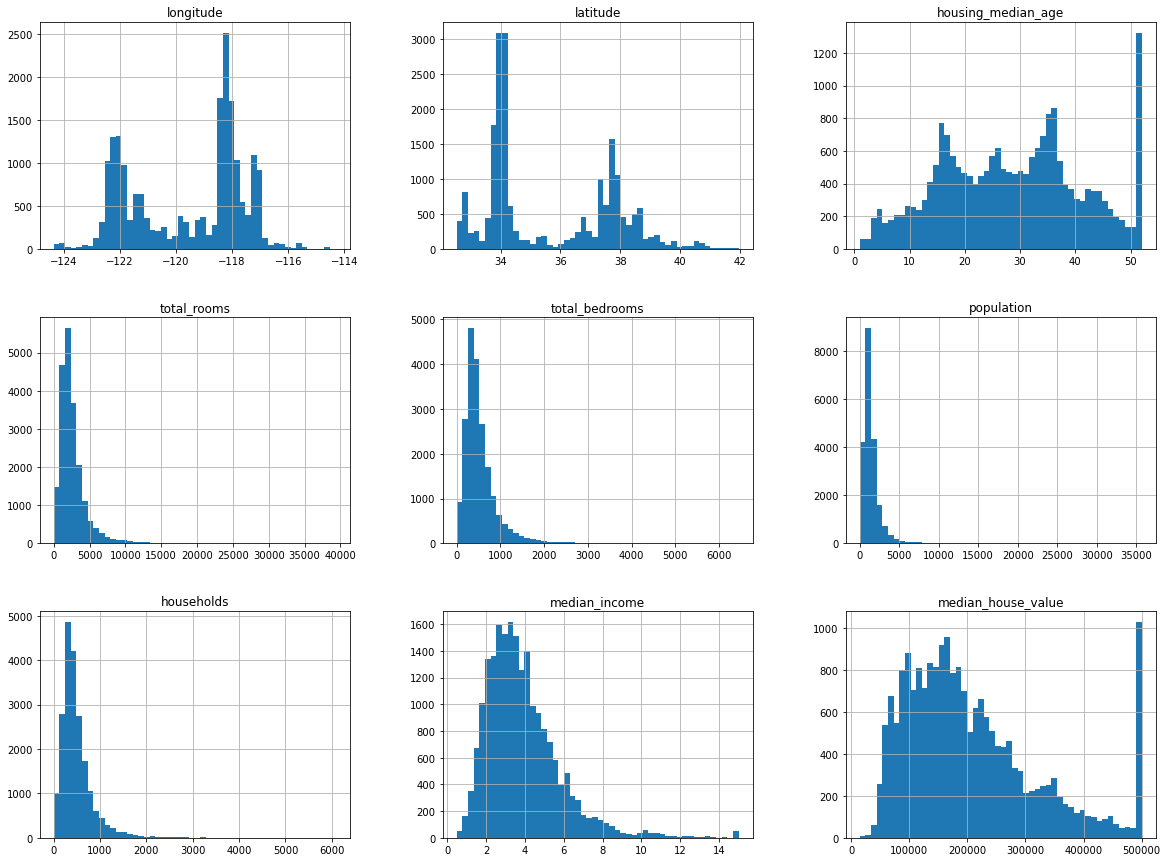

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Le revenu médian est un attribut important pour prédire les prix médians des logements. Si nous regardons de plus près l'histogramme du revenu médian (median_income), la plupart des valeurs du revenu médian sont regroupées autour de 2 à 5 (c.-à-d. 20 000 $ - 50 000 $).

## 1.3. Répartition des données

### 1.4.1. Affichage de la longitude et la latitude

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

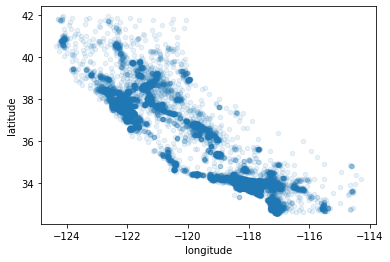

In [8]:
#Nuage de point longitude/latitude
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

### 1.4.2. Lien entre la position géographique et le prix des maisons

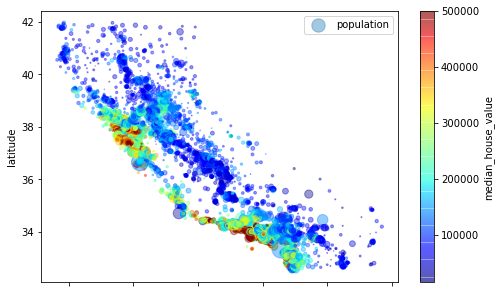

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(8,5),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
       )
plt.legend()

## 3. Modification du graphe

In [10]:
img = mpimg.imread('california.png')
img

array([[[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.666666

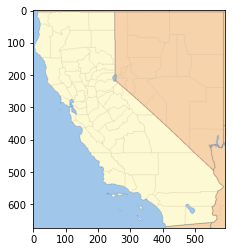

In [11]:
imgplot = plt.imshow(img)

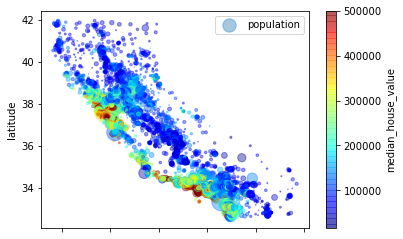

In [12]:
housing.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    alpha=0.4,
    #s=housing["population"].apply(lambda n: n/100), 
    s=housing["population"]/100,
    label="population",
    c="median_house_value", 
    cmap=plt.get_cmap("jet"), 
    colorbar=True,
)
plt.legend()

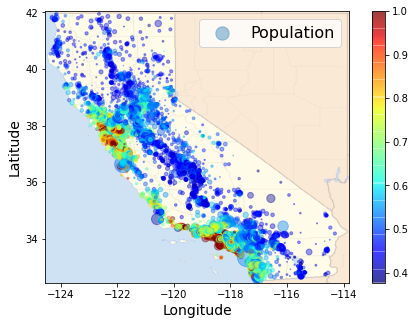

In [13]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(8,5),
                       s=housing['population']/100, label="Population", c="median_house_value",
                        cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()

plt.legend(fontsize=16)
plt.show()

### 1.4.4. La corrélation de l’attribut "median_house_value" 

In [14]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### Une autre façon de vérifier la corrélation entre les attributs consiste à utiliser la fonction scatter_matrix de Pandas, qui trace chaque attribut numérique par rapport à chaque autre attribut numérique.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

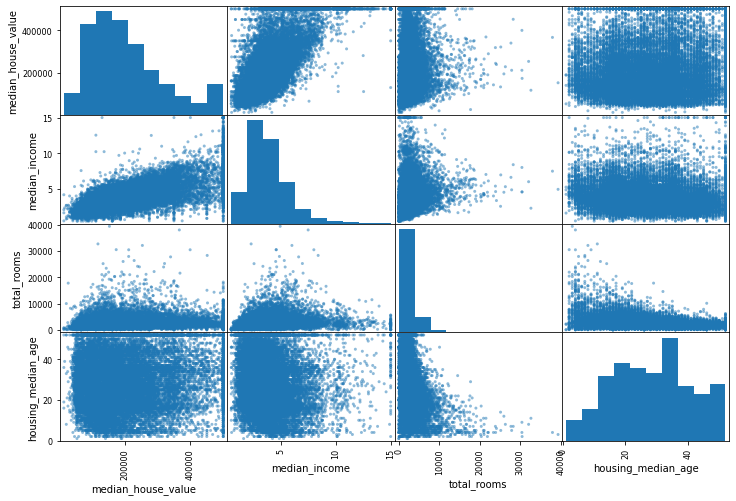

In [15]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

### Remarque : Il existe une forte corrélation entre le revenu médian et la valeur médiane des maisons.

#### Une dernière chose à faire peut être avant de préparer réellement les données pour l'algorithme d'apprentissage automatique est d'essayer diverses combinaisons. Par exemple, le nombre total de chambres à lui seul peut ne pas être utile: vous pouvez le comparer au nombre de chambres. Et la population par ménage semble également être un attribut intéressant à regarder.

In [16]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

#### À partir de la nouvelle matrice de corrélation, nous pouvons constater que les nouveaux attributs bedrooms_per_room sont plus corrélés avec median_house_value que le nombre total_rooms ou total_bedrooms.

## 1.5 Préparation des données pour le ML

In [17]:
income_cat = np.ceil(housing.median_income / 1.5)

income_cat.where(income_cat < 5.0, 5.0, inplace=True)

income_cat.describe()

count    20640.000000
mean         3.006686
std          1.054618
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: median_income, dtype: float64

In [18]:
income_cat.value_counts() / len(income_cat)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: median_income, dtype: float64

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

housing['income_cat'] = income_cat

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]

In [20]:
strat_train_set_copy = strat_train_set.copy()

In [21]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   ocean_proximity           16512 non-null  object 
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16354 non-null  float64
 11  population_per_household  16512 non-null  float64
 12  income_cat                16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [23]:
housing.dropna(subset=['total_bedrooms']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 17606 to 15775
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16354 non-null  float64
 1   latitude                  16354 non-null  float64
 2   housing_median_age        16354 non-null  float64
 3   total_rooms               16354 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16354 non-null  float64
 6   households                16354 non-null  float64
 7   median_income             16354 non-null  float64
 8   ocean_proximity           16354 non-null  object 
 9   rooms_per_household       16354 non-null  float64
 10  bedrooms_per_room         16354 non-null  float64
 11  population_per_household  16354 non-null  float64
 12  income_cat                16354 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


In [24]:
housing.drop('total_bedrooms', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   population                16512 non-null  float64
 5   households                16512 non-null  float64
 6   median_income             16512 non-null  float64
 7   ocean_proximity           16512 non-null  object 
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16354 non-null  float64
 10  population_per_household  16512 non-null  float64
 11  income_cat                16512 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


In [25]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median()).describe()

count    16512.000000
mean       533.998123
std        410.839621
min          2.000000
25%        296.000000
50%        433.000000
75%        641.000000
max       6210.000000
Name: total_bedrooms, dtype: float64

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        5.23228423e+00,  2.03031374e-01,  2.81765270e+00,  3.00000000e+00])

In [27]:
imputer.strategy

'median'

In [28]:
housing.drop("ocean_proximity", axis=1).median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        5.23228423e+00,  2.03031374e-01,  2.81765270e+00,  3.00000000e+00])

In [29]:
X = imputer.transform(housing_num)
X

array([[-121.89      ,   37.29      ,   38.        , ...,    0.22385204,
           2.09439528,    2.        ],
       [-121.93      ,   37.05      ,   14.        , ...,    0.15905744,
           2.7079646 ,    5.        ],
       [-117.2       ,   32.77      ,   31.        , ...,    0.24129098,
           2.02597403,    2.        ],
       ...,
       [-116.4       ,   34.09      ,    9.        , ...,    0.17960865,
           2.74248366,    3.        ],
       [-118.01      ,   33.82      ,   31.        , ...,    0.19387755,
           3.80898876,    3.        ],
       [-122.45      ,   37.77      ,   52.        , ...,    0.22035541,
           1.98591549,    3.        ]])

In [30]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,2.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965,5.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,2.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,2.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847,3.0


## Gestion du texte et des attributs catégoriels

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
encoder = LabelEncoder()

In [33]:
housing_cat = housing.ocean_proximity

In [34]:
housing_cat.describe()

count         16512
unique            5
top       <1H OCEAN
freq           7276
Name: ocean_proximity, dtype: object

In [35]:
housing_cat.value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [36]:
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [37]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [38]:
type(housing_cat_encoded)

numpy.ndarray

In [39]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


### Encodage  : One hot encoding

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
encoder = OneHotEncoder()

In [42]:
print(housing_cat_encoded.shape)
print(type(housing_cat_encoded))

(16512,)
<class 'numpy.ndarray'>


In [43]:
(housing_cat_encoded.reshape(-1, 1)).shape

(16512, 1)

In [44]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

In [45]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

In [47]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Combiner

In [48]:
from sklearn.preprocessing import LabelBinarizer

In [49]:
encoder = LabelBinarizer(sparse_output=False)

In [50]:
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [51]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [52]:
type(housing_cat_1hot)

numpy.ndarray

### Transformateurs personnalisés

In [53]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [54]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,0.159057,2.707965,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847,3.0


In [55]:
housing.iloc[:, 3]

17606    1568.0
18632     679.0
14650    1952.0
3230     1847.0
3555     6592.0
          ...  
6563     1271.0
12053    1196.0
13908    4855.0
11159    1960.0
15775    3095.0
Name: total_rooms, Length: 16512, dtype: float64

In [56]:
X = housing.values

In [57]:
#Ceci peut être réalisé par l'iloc, en utilisant .values
housing.iloc[:, [rooms_ix, bedrooms_ix, households_ix, population_ix]].head()

,total_rooms,total_bedrooms,households,population
17606,1568.0,351.0,339.0,710.0
18632,679.0,108.0,113.0,306.0
14650,1952.0,471.0,462.0,936.0
3230,1847.0,371.0,353.0,1460.0
3555,6592.0,1525.0,1463.0,4459.0


In [58]:
rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
population_per_household = X[:, population_ix] / X[:, households_ix]
bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
np.c_[X, rooms_per_household, population_per_household]
np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

array([[-121.89, 37.29, 38.0, ..., 4.625368731563422, 2.094395280235988,
        0.22385204081632654],
       [-121.93, 37.05, 14.0, ..., 6.008849557522124, 2.7079646017699117,
        0.15905743740795286],
       [-117.2, 32.77, 31.0, ..., 4.225108225108225, 2.0259740259740258,
        0.24129098360655737],
       ...,
       [-116.4, 34.09, 9.0, ..., 6.34640522875817, 2.742483660130719,
        0.1796086508753862],
       [-118.01, 33.82, 31.0, ..., 5.50561797752809, 3.808988764044944,
        0.19387755102040816],
       [-122.45, 37.77, 52.0, ..., 4.843505477308295, 1.9859154929577465,
        0.22035541195476574]], dtype=object)

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=False):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [60]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(X)

In [61]:
print(housing_extra_attribs.shape)
print(housing.shape)

(16512, 15)
(16512, 13)


In [62]:
# Reconvertion en bloc de données
new_columns = housing.columns.append(
    pd.Index(['rooms_per_household', 'population_per_household'])
)
new_columns
housing_extra_attribs_df = pd.DataFrame(housing_extra_attribs, columns=new_columns)
housing_extra_attribs_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,0.223852,2.0944,2,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,0.159057,2.70796,5,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,0.241291,2.02597,2,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,0.200866,4.13598,2,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,0.231341,3.04785,3,4.50581,3.04785


### Mise à l'échelle des features

In [63]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,5.440341,0.212878,3.096437,3.006541
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,2.611712,0.057379,11.584826,1.054602
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.130435,0.100000,0.692308,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,4.442040,0.175304,2.431287,2.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,5.232284,0.203031,2.817653,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,6.056361,0.239831,3.281420,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,141.909091,1.000000,1243.333333,5.000000


In [64]:
housing.total_rooms.describe()

count    16512.000000
mean      2622.728319
std       2138.458419
min          6.000000
25%       1443.000000
50%       2119.500000
75%       3141.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [65]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(housing["total_rooms"].values.reshape(-1, 1))
pd.DataFrame(scalar.transform(housing["total_rooms"].values.reshape(-1, 1)), columns=["total_rooms"])["total_rooms"].describe()

count    16512.000000
mean         0.066560
std          0.054394
min          0.000000
25%          0.036552
50%          0.053759
75%          0.079743
max          1.000000
Name: total_rooms, dtype: float64

In [66]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(housing["total_rooms"].values.reshape(-1, 1))
pd.DataFrame(scalar.transform(housing["total_rooms"].values.reshape(-1, 1)), columns=["total_rooms"])["total_rooms"].describe()

count    1.651200e+04
mean     8.606884e-17
std      1.000030e+00
min     -1.223689e+00
25%     -5.516890e-01
50%     -2.353301e-01
75%      2.423650e-01
max      1.716114e+01
Name: total_rooms, dtype: float64

### Utilisation de Pipeline pour la transformation

In [67]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [68]:
num_pipeline_stage1 = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
])

X_pipeline = num_pipeline_stage1.fit_transform(housing_num)
X = imputer.transform(housing_num)
X_pipeline
np.array_equal(X, X_pipeline)

True

In [69]:
num_pipeline_stage2 = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attr_adder', CombinedAttributesAdder()),
])

Y = attr_adder.fit_transform(X)
Y_pipeline = num_pipeline_stage2.fit_transform(housing_num)
np.array_equal(Y, Y_pipeline)

True

In [70]:
num_pipeline_stage3 = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

Z = scalar.fit_transform(Y)
Z.std(), Z.mean()
Z_pipeline = num_pipeline_stage3.fit_transform(housing_num)
np.array_equal(Z, Z_pipeline)

True

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

class CustomizedLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output=False):
        self.encode = LabelBinarizer(sparse_output = sparse_output)
    def fit(self, X, y=None):
        return self.encode.fit(X)
    def transform(self, X):
        return self.encode.transform(X)


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
]
)

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', CustomizedLabelBinarizer()),
]
)


from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)
housing_prepared

(16512, 19)


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## 2 Sélection, apprentissage et évaluation du modèle

### 2.1. Créez un code permettant d’appliquer la régression linéaire sur les données d’apprentissage

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

### 2.2. Créez un code qui prédit les classes de la base d’apprentissage

In [73]:
# Utilisation de pipeline de prétraitement complet sur quelques instances d'entraînement
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [200799.43811706 325312.90847348 201969.98100248  54877.94450969
 188083.8090477 ]


In [74]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


### 2.3. Calcule de la mesure RMSE du modèle de la régression linéaire

In [75]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67795.96383373722

### 2.4. Les deux étapes précédentes avec le modèle DecisionTreeRegressor

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
tree_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(tree_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 2.5. Vérifier si le modèle fonctionne parfaitement sur la base d’apprentissage.

In [77]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [78]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([71157.45199297, 67703.82135592, 69582.11955143, 68780.05658742,
       69623.33007795, 75668.48721258, 72293.22094237, 69280.61802438,
       75367.1329786 , 71190.95055887])

In [79]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

display_scores(rmse_scores)

Scores: [71157.45199297 67703.82135592 69582.11955143 68780.05658742
 69623.33007795 75668.48721258 72293.22094237 69280.61802438
 75367.1329786  71190.95055887]
Mean: 71064.7189282491
Standard deviation: 2553.688183576966


### Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49724.77565979 47447.87295698 49584.06331057 52511.61021754
 49815.70908443 53401.35909847 48466.91103269 48096.80607716
 52620.6140914  50087.57671689]
Mean: 50175.72982459287
Standard deviation: 1929.0537584105746


In [81]:
forest_prediction = forest_reg.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(forest_prediction, housing_labels))
forest_rmse

18699.608179404895

## 3. Fine-Tunning

### 3.1.1. Création d'un objet de la classe RandomForestRegressor et la variable "param-grid"

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # essayons 12 combinaisons (3 × 4) hyperparamètres
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # puis essayons 6 combinaisons (2 × 3) avec bootstrap défini sur False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# entraîner en 5 fois, soit un total de (12 + 6) * 5 = 90 tours d'entraînement 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

### 3.1.2. Les meilleurs paramètres de la méthode RandomForestRegressor (best_params_)

In [83]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [84]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [85]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65951.11579061151 {'max_features': 2, 'n_estimators': 3}
56722.2813871517 {'max_features': 2, 'n_estimators': 10}
53687.99740045545 {'max_features': 2, 'n_estimators': 30}
61170.13944715856 {'max_features': 4, 'n_estimators': 3}
54547.925401466404 {'max_features': 4, 'n_estimators': 10}
52219.79195374297 {'max_features': 4, 'n_estimators': 30}
59656.71666873836 {'max_features': 6, 'n_estimators': 3}
53724.83838982064 {'max_features': 6, 'n_estimators': 10}
51638.93961505072 {'max_features': 6, 'n_estimators': 30}
60366.644826165706 {'max_features': 8, 'n_estimators': 3}
53540.12698254086 {'max_features': 8, 'n_estimators': 10}
51481.8421360835 {'max_features': 8, 'n_estimators': 30}
64489.836704081456 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55802.03745338149 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61125.71205581601 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53833.76566604758 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [86]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.147427,0.017741,0.007599,0.002088,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.434632e+09,-4.439847e+09,...,-4.349550e+09,1.784373e+08,18,-1.185658e+09,-1.154577e+09,-1.044605e+09,-1.183465e+09,-1.197165e+09,-1.153094e+09,5.603071e+07
1,0.487248,0.032995,0.023671,0.005274,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.017329e+09,-3.342627e+09,...,-3.217417e+09,1.493163e+08,11,-6.188512e+08,-5.931786e+08,-5.785128e+08,-6.201051e+08,-6.142435e+08,-6.049782e+08,1.641207e+07
2,1.304157,0.090616,0.055458,0.005210,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.727594e+09,-2.961218e+09,...,-2.882401e+09,1.526519e+08,5,-4.591602e+08,-4.443483e+08,-4.443255e+08,-4.582256e+08,-4.542131e+08,-4.520545e+08,6.516970e+06
3,0.224412,0.013752,0.006531,0.003682,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.627021e+09,-3.842088e+09,...,-3.741786e+09,1.290068e+08,16,-1.010922e+09,-1.003910e+09,-9.680585e+08,-9.948314e+08,-9.666565e+08,-9.888757e+08,1.830076e+07
4,0.705658,0.026850,0.020343,0.006480,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.887198e+09,-3.053448e+09,...,-2.975476e+09,1.427074e+08,9,-5.632052e+08,-5.600787e+08,-5.403937e+08,-5.683905e+08,-5.459390e+08,-5.556014e+08,1.064012e+07
5,2.104133,0.149345,0.056833,0.007226,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.613095e+09,-2.825417e+09,...,-2.726907e+09,1.456428e+08,3,-4.226985e+08,-4.195997e+08,-4.145225e+08,-4.280854e+08,-4.180537e+08,-4.205920e+08,4.579399e+06
6,0.278171,0.032795,0.008004,0.003775,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.414166e+09,-3.610360e+09,...,-3.558924e+09,1.579089e+08,12,-9.436793e+08,-9.347314e+08,-9.325696e+08,-9.962390e+08,-9.165100e+08,-9.447458e+08,2.719740e+07
7,0.897073,0.067703,0.019591,0.000523,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.710928e+09,-2.956468e+09,...,-2.886358e+09,1.570669e+08,6,-5.196633e+08,-5.250667e+08,-5.208051e+08,-5.501900e+08,-5.274941e+08,-5.286438e+08,1.113955e+07
8,2.796482,0.137070,0.062391,0.002795,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.440882e+09,-2.718849e+09,...,-2.666580e+09,1.727479e+08,2,-3.992735e+08,-4.016566e+08,-4.070982e+08,-4.245247e+08,-4.040255e+08,-4.073157e+08,8.985834e+06
9,0.344460,0.034365,0.005162,0.004268,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.521490e+09,-3.801977e+09,...,-3.644132e+09,1.799902e+08,14,-9.201450e+08,-9.143009e+08,-9.183076e+08,-9.532122e+08,-9.472773e+08,-9.306486e+08,1.622038e+07


In [87]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set.median_house_value.copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(final_predictions, y_test)
final_rmse = np.sqrt(final_mse)
final_rmse

50084.330956994345